In [1]:
"""
Purpose: To Inspect the Neurons that were really bad

"""

'\nPurpose: To Inspect the Neurons that were really bad\n\n'

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import datajoint as dj
import trimesh
from tqdm.notebook import tqdm
from pathlib import Path

from os import sys
sys.path.append("/meshAfterParty/")
sys.path.append("/meshAfterParty/meshAfterParty")

import datajoint_utils as du
from importlib import reload

INFO - 2021-04-24 09:24:12,916 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-24 09:24:12,917 - settings - Setting database.user to celiib
INFO - 2021-04-24 09:24:12,917 - settings - Setting database.password to newceliipass
INFO - 2021-04-24 09:24:12,922 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2021-04-24 09:24:12,922 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-24 09:24:12,932 - connection - Connect

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-04-24 09:24:13,331 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-24 09:24:13,335 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-24 09:24:13,335 - settings - Setting database.user to celiib
INFO - 2021-04-24 09:24:13,336 - settings - Setting database.password to newceliipass
INFO - 2021-04-24 09:24:13,336 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-24 09:24:13,337 - settings - Setting database.user to celiib
INFO - 2021-04-24 09:24:13,337 - settings - Setting database.password to newceliipass
INFO - 2021-04-24 09:24:13,338 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-24 09:24:13,797 - settings - Setting enable_python_native_blobs to True


In [4]:
#configuring will include the adapters
minnie,schema = du.configure_minnie_vm()

INFO - 2021-04-24 09:24:16,351 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-24 09:24:16,353 - settings - Setting database.user to celiib
INFO - 2021-04-24 09:24:16,354 - settings - Setting database.password to newceliipass
INFO - 2021-04-24 09:24:16,357 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-24 09:24:16,865 - settings - Setting enable_python_native_blobs to True


In [5]:
import validation_utils as vu
import neuron_visualizations as nviz
import neuron_utils as nru
import proofreading_utils as pru
import time
import system_utils as su

# Downloading the Neuron

In [6]:
seg_id = 864691136311791677

Decompressing Neuron in minimal output mode...please wait


 ----- Working on coordinate [833027.34636694 758702.0865743  901936.25102521]--------
coordinate [833027.34636694 758702.0865743  901936.25102521] had error branches []--------


 ----- Working on coordinate [866250. 757323. 875952.]--------
coordinate [866250. 757323. 875952.] had error branches [13, 16, 18]--------


 ----- Working on coordinate [1221456.34204044  724568.28233463  977648.85747771]--------
coordinate [1221456.34204044  724568.28233463  977648.85747771] had error branches [13, 16, 18, 45, 47]--------


 ----- Working on coordinate [1234341.   717316.9  981884.7]--------
coordinate [1234341.   717316.9  981884.7] had error branches [13, 16, 18, 45, 47, 69, 72, 68]--------


 ----- Working on coordinate [1284898.   655602.1  970714.2]--------
coordinate [1284898.   655602.1  970714.2] had error branches [13, 16, 18, 45, 47, 69, 72, 68, 77, 73]--------


 ----- Working on coordinate [1291710.5062591   664413.846

limb_branch_dict_to_cancel = {'L1': [52, 60]}
limb_branch_dict_to_cancel = {'L1': [16], 'L3': [2, 11]}
limb_branch_dict_to_cancel = {'L1': array([ 63,  68, 122])}
Apply the presyn non_error
For presyn: # valid synapses = 126, # error synapses  = 320, # error presyns = 33
For postsyn: # valid synapses = 6884, # error synapses  = 129, # error presyns = 0
Synapsse Results:
Total Number of Synapses = 7459
n_valid_syn_ids_presyn = 126
n_errored_syn_ids_presyn = 320
n_valid_syn_ids_postsyn = 6884
n_errored_syn_ids_postsyn = 129
Segment Id = 864691136311791677
Postsyn counts:
TP:6876
TN:33
FP:8
FN:96
Presyn counts:
TP:108
TN:278
FP:18
FN:9


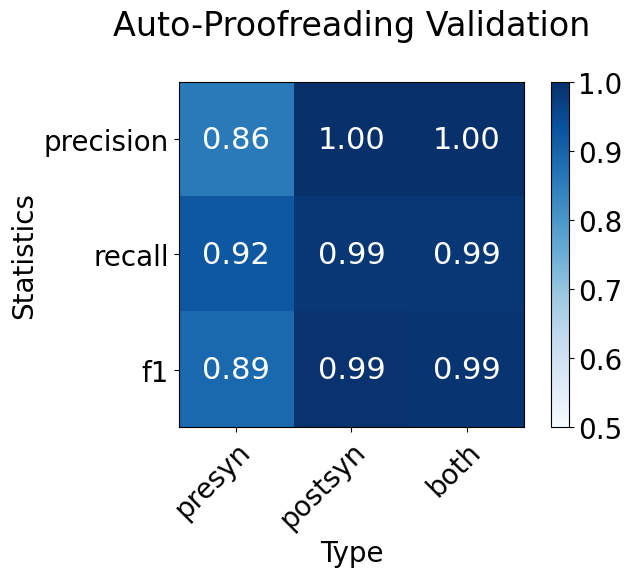

In [43]:
#1) Dwonload the neuron object
neuron_obj = du.fetch_neuron_obj_manual(seg_id,
                                   border_validation=True)

(filt_neuron,
 return_synapse_df_revised,
return_validation_df_revised) =  vu.filtered_neuron_score(neuron_obj = neuron_obj,   
                    filter_list = pru.v4_exc_filters(),
                    plot_limb_branch_filter_with_disconnect_effect = False,
                    verbose = False,
                    plot_score=False)

vu.synapse_validation_df_to_score_plot(return_validation_df_revised)

In [8]:
vu.plot_validation_synapses(seg_id,
                            validation_df = return_validation_df_revised,
                             synapse_dict = None,
                             synapses_type_to_plot = None,
                             synapses_type_to_not_plot = None,
                             verbose=False,
                             synapse_type = "presyn",
                             TP_color="yellow",
                            TN_color="aqua",
                            FP_color="black",
                            FN_color="orange",
                             synapse_scatter_size = 0.15,
                             
                             #for plotting the actual mesh parts to go along
                             
                             neuron_obj = filt_neuron,
                             plot_only_axon_skeleton = True,
                             error_mesh_color = "red",
                             valid_mesh_color = "green",
                             valid_skeleton_color = "black",
                             mesh_alpha = 0.3,)

Using the mesh from the neuron object


TP:yellow
TN:aqua
FP:black
FN:orange



 Working on visualization type: mesh

 Working on visualization type: skeleton


In [13]:
(filt_neuron,
 return_synapse_df_revised,
return_validation_df_revised) =  vu.filtered_neuron_score(neuron_obj = neuron_obj,   
                    filter_list = pru.v4_exc_filters(),
                    plot_limb_branch_filter_with_disconnect_effect = True,
                    verbose = True,
                    plot_score=True)


--- Working on filter 0:
function = axon_on_dendrite_merges
function __name__ = filter_away_axon_on_dendrite_merges
function arguments = {'use_pre_existing_axon_labels': True}




Branches Requested to Remove (WITH disconnect effect)

 Working on visualization type: mesh



--- Working on filter 1:
function = high_degree_branching
function __name__ = filter_away_high_degree_branching
function arguments = {'offset': 1500, 'comparison_distance': 2000, 'worst_case_match_threshold': 65, 'width_diff_max': inf, 'match_threshold': 45, 'angle_buffer': 15, 'max_degree_to_resolve': 6, 'match_method': 'best_match'}


limb_branch_dict_to_cancel = {'L1': array([ 13,  16,  18,  45,  47,  69,  72,  68,  77,  73, 128, 113, 141,
       144, 155, 146, 171, 164, 178, 182, 197, 199, 201, 198, 203, 181,
       204, 205, 230, 233, 239, 247, 234, 267, 255, 265, 276, 279, 270,
       283, 287, 289, 277, 325, 326, 330, 331, 333, 354, 349, 361, 362,
       358, 365, 367, 369, 371, 372, 376, 377, 380, 381])}


Branches Requested to Remove (WITH disconnect effect)

 Working on visualization type: mesh



--- Working on filter 2:
function = axon_webbing_t_merges
function __name__ = filter_away_webbing_t_merges
function arguments = {'child_width_maximum': 75, 'parent_width_maximum': 75, 'axon_only': True, 'error_if_web_is_none': True, 'web_size_threshold': 120, 'web_size_type': 'ray_trace_median', 'web_above_threshold': True}


limb_branch_dict_to_cancel = {}

--- Working on filter 3:
function = double_back_and_width_change
function __name__ = filter_away_large_double_back_or_width_changes
function arguments = {'perform_double_back_errors': True, 'skip_double_back_errors_for_axon': False, 'width_jump_threshold': 250, 'running_width_jump_method': True, 'double_back_axon_like_threshold': 145, 'double_back_threshold': 120, 'allow_axon_double_back_angle_with_top': 39, 'skeletal_length_to_skip': 4000, 'comparison_distance': 3000}


limb_branch_dict_to_cancel = {'L3': [2, 11]}


Branches Requested to Remove (WITH disconnect effect)

 Working on visualization type: mesh


KeyboardInterrupt: 

# Inspecting why crossover did so poorly

In [14]:
limb_obj = neuron_obj[neuron_obj.axon_limb_name]

In [15]:
exactly_equal = False
crossover_coordinates = nru.high_degree_branching_coordinates_on_limb(limb_obj,min_degree_to_find=4,
                                                                         exactly_equal=exactly_equal,
                                                                         )
crossover_coordinates

array([[ 833027.34636694,  758702.0865743 ,  901936.25102521],
       [ 866250.        ,  757323.        ,  875952.        ],
       [1221456.34204044,  724568.28233463,  977648.85747771],
       [1234341.        ,  717316.9       ,  981884.7       ],
       [1284898.        ,  655602.1       ,  970714.2       ],
       [1291710.5062591 ,  664413.84644955,  966354.28707058],
       [1293295.26041407,  602781.72046245, 1032374.83128578],
       [1295954.36071922,  741776.22336066,  845819.53321973],
       [1297169.02500658,  637095.10432843,  983485.00477034],
       [1300460.24850687,  756784.21784004,  859365.70680213],
       [1300780.70382353,  679269.69872623,  933873.55716712],
       [1301938.28873855,  729646.70418193,  828153.92361702],
       [1310608.59796591,  680456.38691622,  929260.9269997 ],
       [1314432.44784318,  723078.74396539,  805785.27771566],
       [1315761.30023846,  735311.28639619,  805160.29886765],
       [1317626.        ,  711649.3       ,  804450.1  

In [ ]:
winning_downstream,error_downstream = ed.high_degree_upstream_match(limb_obj,
                          coordinate = crossover_coordinates[1],
                        plot_intermediates = True,
                        plot_match_intermediates = True,
                          verbose=True)
print(winning_downstream,error_downstream)

In [22]:
from importlib import reload
ed = reload(ed)

In [41]:
import error_detection as ed
err_dict = ed.high_degree_branch_errors_limb_branch_dict(neuron_obj,
                                                        verbose = True,
                                                        match_method="best_match")



 ----- Working on coordinate [833027.34636694 758702.0865743  901936.25102521]--------
For test node 12, sibling nodes were: [13 16 18]
overlap = [13 16 18]
With test node equal to the downstream node
upstream = 14, downstream_nodes = [13 16 18 12]
branches_at_coord = [12 13 14 16 18]
coordinate_branches = [12, 13, 14, 16, 18]
12 = blue
13 = green
14 = red
16 = cyan
18 = magenta
Angle between 12 and 13 = 75.28 
Angle between 12 and 14 = 18.98 
Angle between 12 and 16 = 130.55 
Angle between 12 and 18 = 91.82 
Angle between 13 and 14 = 111.67 
Angle between 13 and 16 = 37.2 
Angle between 13 and 18 = 19.75 
Angle between 14 and 16 = 54.1 
Angle between 14 and 18 = 76.35 
Angle between 16 and 18 = 123.28 
Final Matches = [[12, 14], [13, 16], [13, 18], [14, 16]], Final Matches Angle = [18.98, 37.2, 19.75, 54.1]
matched_edges = [[12, 14], [13, 16], [13, 18], [14, 16]]matched_edges_angles = [18.98, 37.2, 19.75, 54.1]
Step 2: Edges with worst case scenario matching = 65
Remaining Edges = [

Angle between 116 and 131 = 21.5 
Angle between 128 and 131 = 90.71 
Final Matches = [[113, 131], [116, 131]], Final Matches Angle = [33.98, 21.5]
matched_edges = [[113, 131], [116, 131]]matched_edges_angles = [33.98, 21.5]
Step 2: Edges with worst case scenario matching = 65
Remaining Edges = [(113, 131), (116, 131)], Remaining Nodes = [113, 116, 128, 131]
edges_to_remove_by_width = []
Step 2: Edges after widht mismatch
Remaining Edges = [(113, 131), (116, 131)], Remaining Nodes = [113, 116, 128, 131]
--Working on edge [113 131]--
--Working on edge [116 131]--
Step 4: Definite Edges
Remaining Edges = [(113, 131), (116, 131)], Remaining Nodes = [113, 116, 128, 131]
upstream_subgraph = [113 131 116]
Possible Connections = [113 116], angles = [33.98 21.5 ]
Deleting the following nodes because above match threshold while 2 are: []
Step 5: Removing worst case edges
Remaining Edges = [(113, 131), (116, 131)]
Using best match method
for upstream node 131, winning_node = 116, error_branches =

Angle between 188 and 199 = 134.56 
Angle between 188 and 201 = 79.55 
Angle between 197 and 199 = 11.3 
Angle between 197 and 201 = 121.17 
Angle between 199 and 201 = 47.84 
Final Matches = [[188, 197], [197, 199], [199, 201]], Final Matches Angle = [42.86, 11.3, 47.84]
matched_edges = [[188, 197], [197, 199], [199, 201]]matched_edges_angles = [42.86, 11.3, 47.84]
Step 2: Edges with worst case scenario matching = 65
Remaining Edges = [(188, 197), (197, 199), (199, 201)], Remaining Nodes = [188, 197, 199, 201]
edges_to_remove_by_width = []
Step 2: Edges after widht mismatch
Remaining Edges = [(188, 197), (197, 199), (199, 201)], Remaining Nodes = [188, 197, 199, 201]
--Working on edge [188 197]--
--Working on edge [197 199]--
Edge [197 199] is matches definite match threshold with: 
Edge Buffer of 31.56 (angle_buffer = 15)
Edge Angle of 11.3 (match_threshold = 45)
--Working on edge [199 201]--
Step 4: Definite Edges
Remaining Edges = [(197, 199)], Remaining Nodes = [188, 197, 199, 201

Angle between 255 and 266 = 45.23 
Angle between 255 and 267 = 29.71 
Angle between 259 and 266 = 27.18 
Angle between 259 and 267 = 50.29 
Angle between 266 and 267 = 107.38 
Final Matches = [[255, 266], [255, 267], [259, 266], [259, 267]], Final Matches Angle = [45.23, 29.71, 27.18, 50.29]
matched_edges = [[255, 266], [255, 267], [259, 266], [259, 267]]matched_edges_angles = [45.23, 29.71, 27.18, 50.29]
Step 2: Edges with worst case scenario matching = 65
Remaining Edges = [(255, 266), (255, 267), (259, 266), (259, 267)], Remaining Nodes = [255, 259, 266, 267]
edges_to_remove_by_width = []
Step 2: Edges after widht mismatch
Remaining Edges = [(255, 266), (255, 267), (259, 266), (259, 267)], Remaining Nodes = [255, 259, 266, 267]
--Working on edge [255 266]--
--Working on edge [255 267]--
Edge [255 267] is matches definite match threshold with: 
Edge Buffer of 15.519999999999996 (angle_buffer = 15)
Edge Angle of 29.71 (match_threshold = 45)
--Working on edge [259 266]--
Edge [259 266]

Angle between 151 and 323 = 25.44 
Angle between 151 and 325 = 83.72 
Angle between 151 and 326 = 39.83 
Angle between 323 and 325 = 71.08 
Angle between 323 and 326 = 121.89 
Angle between 325 and 326 = 122.15 
Final Matches = [[151, 323], [151, 326]], Final Matches Angle = [25.44, 39.83]
matched_edges = [[151, 323], [151, 326]]matched_edges_angles = [25.44, 39.83]
Step 2: Edges with worst case scenario matching = 65
Remaining Edges = [(151, 323), (151, 326)], Remaining Nodes = [151, 323, 325, 326]
edges_to_remove_by_width = []
Step 2: Edges after widht mismatch
Remaining Edges = [(151, 323), (151, 326)], Remaining Nodes = [151, 323, 325, 326]
--Working on edge [151 323]--
--Working on edge [151 326]--
Step 4: Definite Edges
Remaining Edges = [(151, 323), (151, 326)], Remaining Nodes = [151, 323, 325, 326]
upstream_subgraph = [323 326 151]
Possible Connections = [323 326], angles = [25.44 39.83]
Deleting the following nodes because above match threshold while 2 are: []
Step 5: Removin

Angle between 373 and 377 = 34.68 
Angle between 376 and 377 = 106.35 
Final Matches = [[369, 373], [373, 377]], Final Matches Angle = [23.39, 34.68]
matched_edges = [[369, 373], [373, 377]]matched_edges_angles = [23.39, 34.68]
Step 2: Edges with worst case scenario matching = 65
Remaining Edges = [(369, 373), (373, 377)], Remaining Nodes = [369, 373, 376, 377]
edges_to_remove_by_width = []
Step 2: Edges after widht mismatch
Remaining Edges = [(369, 373), (373, 377)], Remaining Nodes = [369, 373, 376, 377]
--Working on edge [369 373]--
--Working on edge [373 377]--
Step 4: Definite Edges
Remaining Edges = [(369, 373), (373, 377)], Remaining Nodes = [369, 373, 376, 377]
upstream_subgraph = [369 373 377]
Possible Connections = [373], angles = [23.39]
Deleting the following nodes because above match threshold while 1 are: []
Step 5: Removing worst case edges
Remaining Edges = [(369, 373), (373, 377)]
Using best match method
for upstream node 369, winning_node = 373, error_branches = [376 

In [19]:
neuron_obj["L1"][186]

In [42]:
nviz.visualize_neuron(neuron_obj,
                     limb_branch_dict=err_dict,
                     mesh_whole_neuron=True
                     )


 Working on visualization type: mesh

 Working on visualization type: skeleton


limb_name = L1

 Working on visualization type: mesh

 Working on visualization type: skeleton


No limb name was given so using L1 because was the limb in the first key


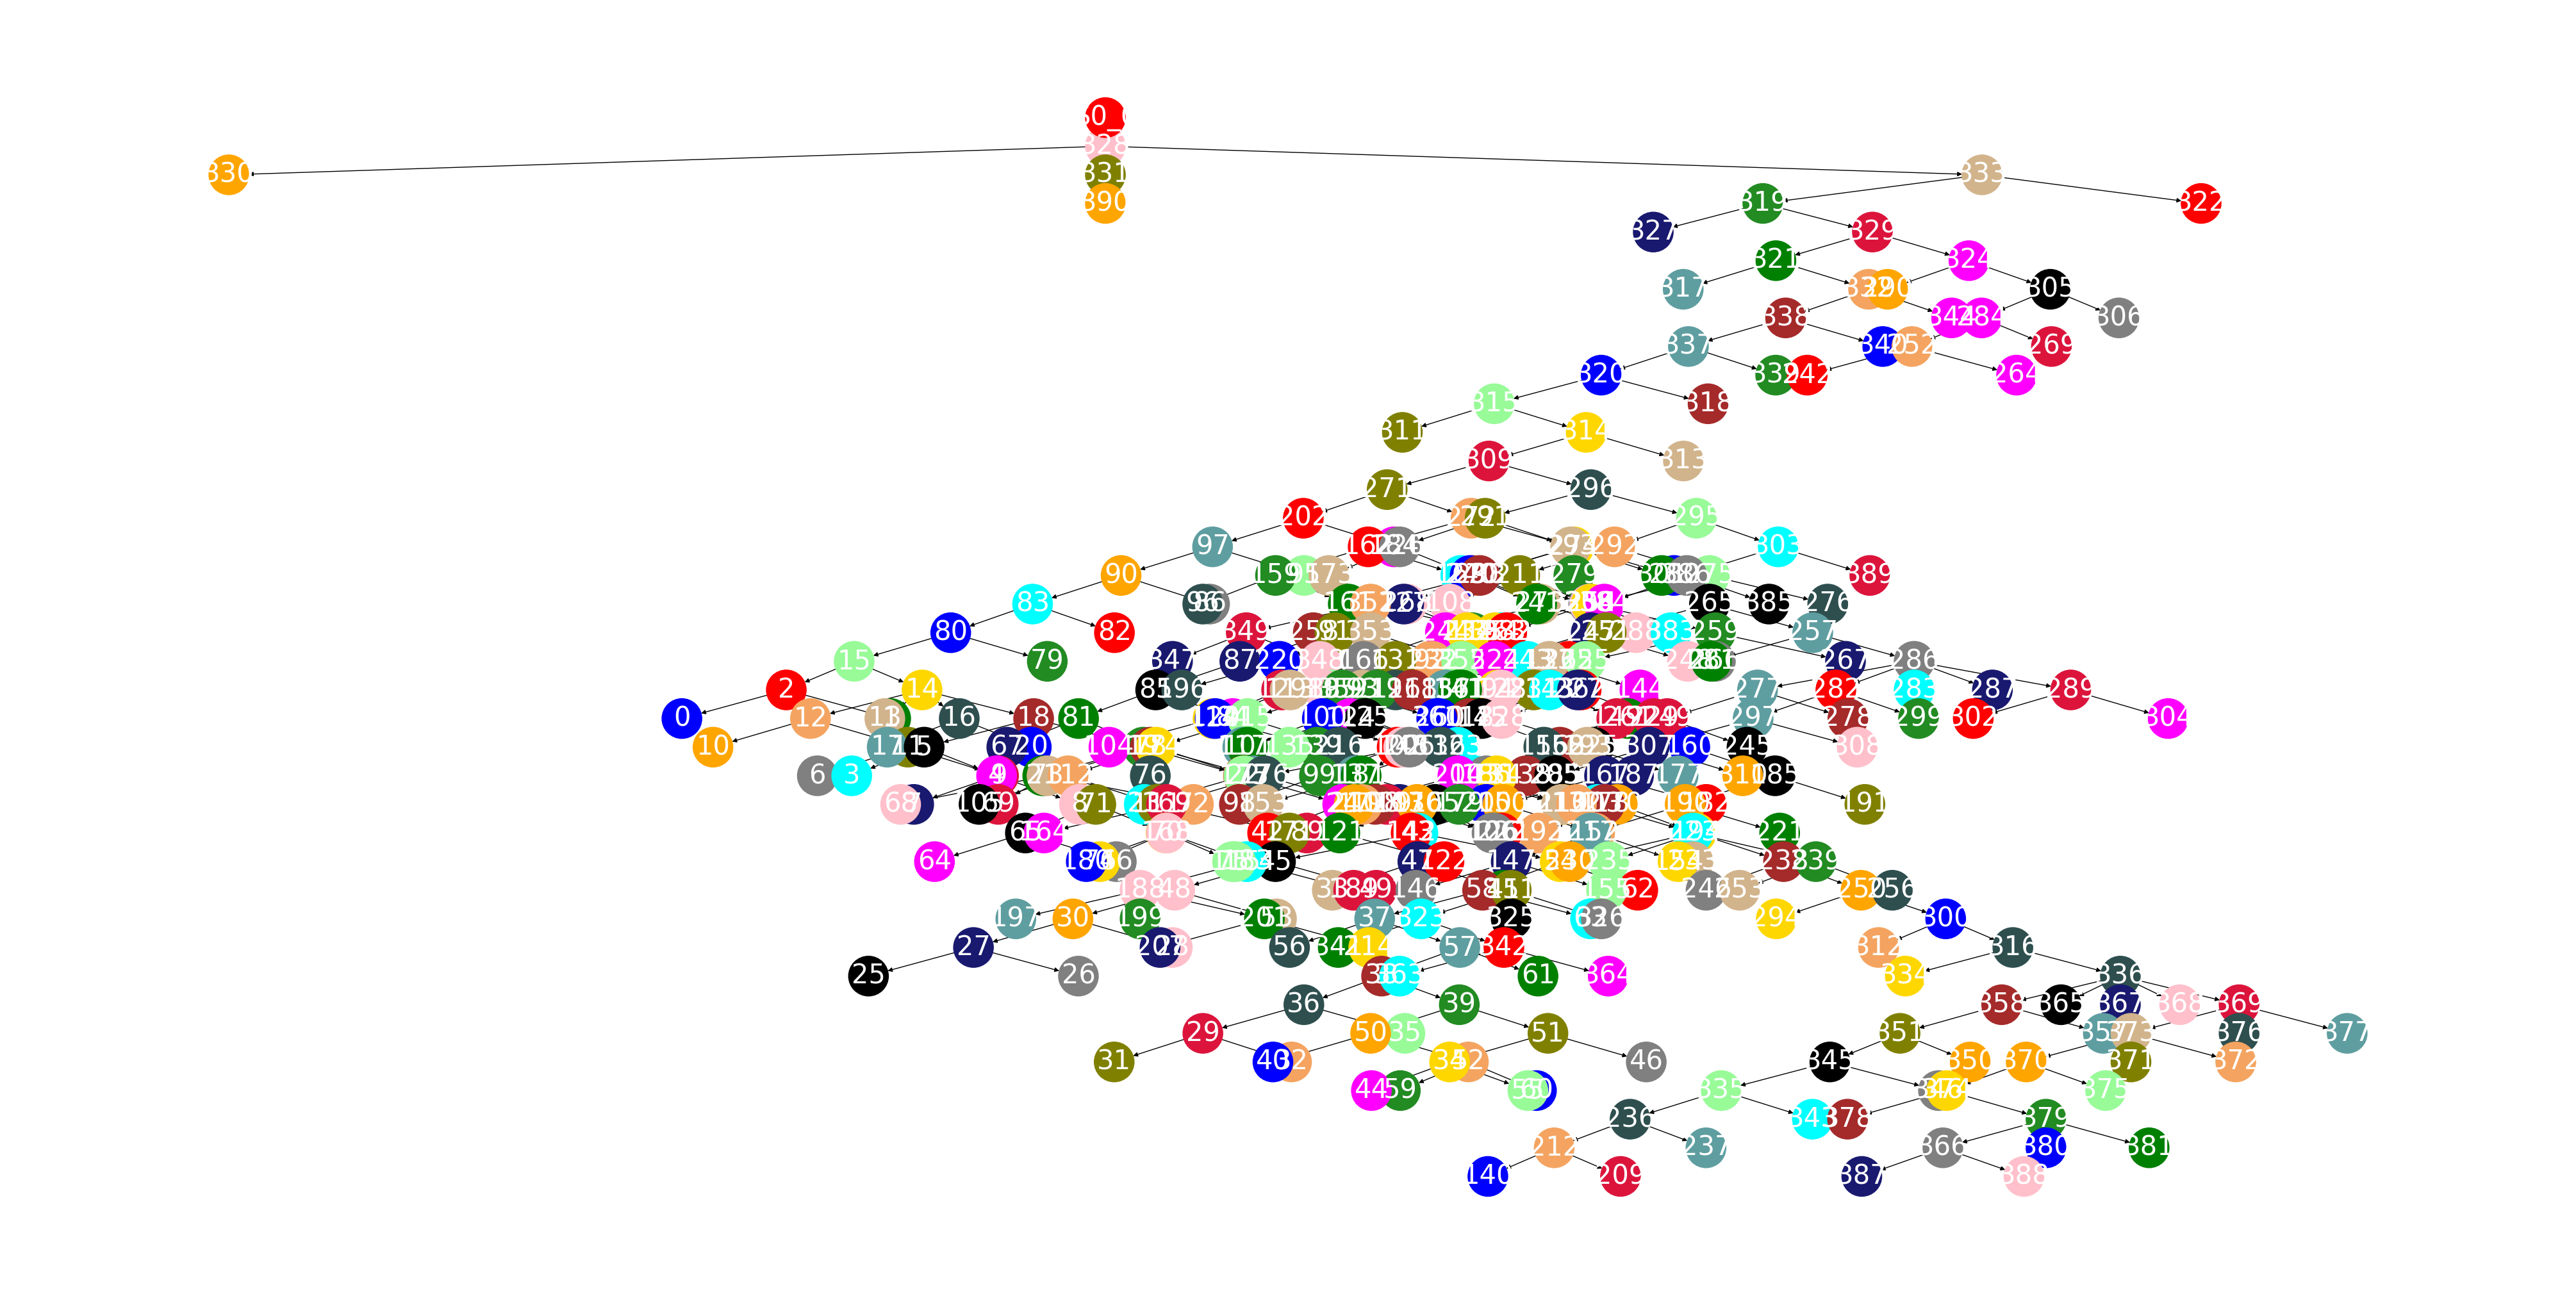

In [27]:
nviz.visualize_neuron_specific_limb(neuron_obj,1)

In [30]:
import networkx_utils as xu
xu.downstream_nodes(neuron_obj[1].concept_network_directional,328)

array([330, 331, 333])

In [40]:
import numpy_utils as nu
ed.high_degree_upstream_match(
    limb_obj,
    coordinate = None,
    upstream_branch = 328,
    downstream_branches = np.array([330, 331, 333]),

    #arguments for the angle checking
    offset=1500,
    comparison_distance = 2000,
    worst_case_match_threshold = 65,
    plot_intermediates = True,
    plot_match_intermediates = True,

    #args for width matching
    width_diff_max = np.inf,#100,

    #args for definite pairs
    match_threshold = 45,
    angle_buffer = 15,
    
    max_degree_to_resolve = 6,
    axon_dependent = True,

    #args for picking the final winner
    match_method = "lowest_angle_sum", #other option is "best_match"
    verbose = True
    )

branches_at_coord = [330 331 333 328]
Returning No errors because widths are too thick for skeletons to be trusted


(None, [])

In [37]:
import axon_utils as au
au.axon_width(neuron_obj[1][333])

410.3995996693431

In [ ]:
array([330, 331, 333])